In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import glob

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.
import os
print(os.listdir('../input'))

['eplresults18.csv']


In [2]:
data_path = "../input/eplresults18.csv"
data = pd.read_csv(data_path)

In [3]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,19/08/2000,Tottenham,Ipswich,3,1,H,2,1,H,Alan Wiley,20,15,14,13,3,4,0,0,0,0,2000-2001
1,19/08/2000,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,6,13,11,13,5,8,1,1,0,0,2000-2001
2,19/08/2000,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,6,16,15,21,8,4,5,3,1,0,2000-2001
3,19/08/2000,Leeds,Everton,2,0,H,2,0,H,Dermot Gallagher,17,12,21,20,6,4,1,3,0,0,2000-2001
4,19/08/2000,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,17,12,19,14,7,7,1,2,0,0,2000-2001


In [9]:
data.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'Season'],
      dtype='object')

In [5]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number): #and column != 'AwayTeam':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [6]:
label_encoders = create_label_encoder_dict(data)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(Date) = ['1/1/2001' '1/1/2002' '1/1/2003' ... '9/9/2001' '9/9/2006' '9/9/2017']
           Encoded Values
1/1/2001                0
1/1/2002                1
1/1/2003                2
1/1/2005                3
1/1/2007                4
1/1/2008                5
1/1/2011                6
1/1/2012                7
1/1/2013                8
1/1/2014                9
1/1/2015               10
1/1/2017               11
1/1/2018               12
1/10/2000              13
1/10/2005              14
1/10/2006              15
1/10/2007              16
1/10/2011              17
1/10/2012              18
1/10/2016              19
1/10/2017              20
1/11/2003              21
1/11/2004              22
1/11/2008              23
1/11/2009              24
1/11/2010              25
1/11/2014              26
1/11/2015              27
1/12/2001              28
1/12/2002              29
...                   ...
9/2/2010             1774
9/2/2013             177

In [7]:

# Apply each encoder to the data set to obtain transformed values
data2 = data.copy() # create copy of initial data set
for column in data2.columns:
    if column in label_encoders:
        data2[column] = label_encoders[column].transform(data2[column])

print("Transformed data set")
print("="*32)
data2

Transformed data set


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,630,38,20,3,1,2,2,1,2,9,20,15,14,13,3,4,0,0,0,0,0
1,630,15,34,2,2,1,1,2,0,10,6,13,11,13,5,8,1,1,0,0,0
2,630,13,27,1,3,0,1,1,1,17,6,16,15,21,8,4,5,3,1,0,0
3,630,21,16,2,0,2,2,0,2,41,17,12,21,20,6,4,1,3,0,0,0
4,630,12,41,4,2,2,1,0,2,60,17,12,19,14,7,7,1,2,0,0,0
5,630,22,1,0,0,1,0,0,1,97,5,5,12,12,5,4,2,3,0,0,0
6,630,23,7,1,0,2,0,0,1,114,16,3,8,8,6,1,1,1,0,0,0
7,630,11,24,4,0,2,2,0,2,127,17,8,13,12,6,6,1,2,0,0,0
8,630,36,0,1,0,2,0,0,1,141,8,14,10,21,2,9,3,1,0,1,0
9,757,25,28,2,0,2,1,0,2,142,19,9,7,13,7,1,0,1,0,0,0


In [32]:
# separate our data into dependent (Y) and independent(X) variables
X_data = data2[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Y_data = data2['FTR']

In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30)

In [35]:
print(data2['HomeTeam'].value_counts())

0     342
38    342
12    342
16    342
23    342
25    342
24    323
28    304
1     304
41    285
36    266
17    247
40    228
5     209
3     209
34    209
35    190
27    171
42    152
22    133
30    133
2     133
37    133
11    133
14    114
19     95
29     95
9      76
21     76
39     76
43     76
15     57
6      57
32     57
31     57
20     38
13     19
33     19
10     19
18     19
26     19
7      19
8      19
4      19
Name: HomeTeam, dtype: int64


In [36]:
print(data2['HomeTeam'].value_counts().count)

<bound method Series.count of 0     342
38    342
12    342
16    342
23    342
25    342
24    323
28    304
1     304
41    285
36    266
17    247
40    228
5     209
3     209
34    209
35    190
27    171
42    152
22    133
30    133
2     133
37    133
11    133
14    114
19     95
29     95
9      76
21     76
39     76
43     76
15     57
6      57
32     57
31     57
20     38
13     19
33     19
10     19
18     19
26     19
7      19
8      19
4      19
Name: HomeTeam, dtype: int64>


In [37]:
#Determine pivot table
impute_grps = data2.pivot_table(values=["FTR"], index=['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'], aggfunc=np.mean)
print (impute_grps)

                                                               FTR
FTHG FTAG HTHG HTAG HTR Referee HS AS HF AF HC AC HY AY HR AR     
0    0    0    0    1   0       9  6  12 7  1  4  0  1  0  0     1
                                11 9  15 16 4  6  3  5  0  0     1
                                   11 12 18 17 3  1  2  0  0     1
                                16 8  11 12 9  3  0  1  0  0     1
                                27 0  6  10 12 0  0  1  0  0     1
                        1       4  18 11 11 3  4  1  2  0  0     1
                                8  7  14 13 5  2  2  2  0  0     1
                                10 10 13 8  10 5  2  0  0  0     1
                                   13 16 17 2  4  0  2  0  0     1
                                11 5  14 12 7  2  1  1  0  0     1
                                   19 11 5  2  9  1  0  0  0     1
                                      15 11 2  6  1  0  0  0     1
                                13 13 10 15 5  8  1  3  0  0  

In [38]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [46]:
# Create the classifier with a maximum depth of 2 using entropy as the criterion for choosing most significant nodes
# to build the tree
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=2, max_depth=3, splitter='best') 
# Hint : Change the max_depth to 10 or another number to see how this affects the tree

In [47]:
# Build the classifier  by training it on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
pd.DataFrame([ "%.2f%%" % perc for perc in (clf.feature_importances_ * 100) ], index = X_data.columns, columns = ["Feature Significance in Decision Tree"])

,Feature Significance in Decision Tree
FTHG,44.45%
FTAG,55.55%
HTHG,0.00%
HTAG,0.00%
HTR,0.00%
Referee,0.00%
HS,0.00%
AS,0.00%
HF,0.00%
AF,0.00%


In [49]:
import graphviz

In [50]:
dot_data = tree.export_graphviz(clf,out_file=None, 
                                feature_names=X_data.columns, 
                         class_names=label_encoders[Y_data.name].classes_,  
                         filled=True, rounded=True,  proportion=True,
                                node_ids=True, impurity=False,
                         special_characters=True)

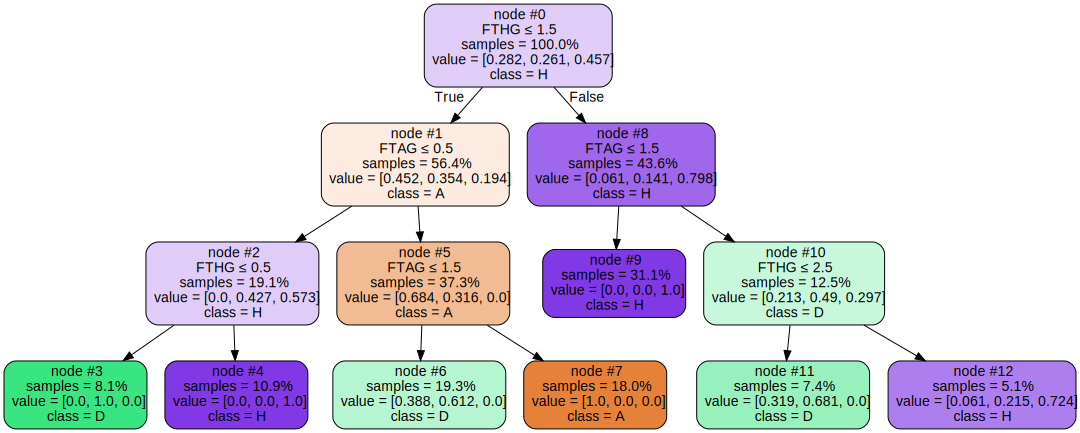

In [51]:
graph = graphviz.Source(dot_data) 
graph

In [52]:
def tree_to_code(tree, feature_names, label_encoders={}):
    from sklearn.tree import _tree

    '''
    Outputs a decision tree model as a Python function
    
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as a function
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def decision_tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            #print(node)
            
            name = tree_.feature[node] 
            if name in label_encoders:
                if isinstance(label_encoders[name] , LabelEncoder) or True:
                    print ("{}-return {}".format(indent, label_encoders[name].inverse_transform(tree_.value[node])))
                    return
            print("{}return {} # Distribution of samples in node".format(indent, tree_.value[node]))

    recurse(0, 1)

In [53]:
print("Decision Tree Rules")
print("="*32)
tree_to_code(clf, X_data.columns, label_encoders)

Decision Tree Rules
def decision_tree(FTHG, FTAG, HTHG, HTAG, HTR, Referee, HS, AS, HF, AF, HC, AC, HY, AY, HR, AR):
  if FTHG <= 1.5:
    if FTAG <= 0.5:
      if FTHG <= 0.5:
        return [[  0. 390.   0.]] # Distribution of samples in node
      else:  # if FTHG > 0.5
        return [[  0.   0. 524.]] # Distribution of samples in node
    else:  # if FTAG > 0.5
      if FTAG <= 1.5:
        return [[358. 565.   0.]] # Distribution of samples in node
      else:  # if FTAG > 1.5
        return [[864.   0.   0.]] # Distribution of samples in node
  else:  # if FTHG > 1.5
    if FTAG <= 1.5:
      return [[   0.    0. 1487.]] # Distribution of samples in node
    else:  # if FTAG > 1.5
      if FTHG <= 2.5:
        return [[113. 241.   0.]] # Distribution of samples in node
      else:  # if FTHG > 2.5
        return [[ 15.  53. 178.]] # Distribution of samples in node


In [54]:

label_encoders = create_label_encoder_dict(data2)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label


In [55]:
k=(clf.predict(X_test) == y_test) # Determine how many were predicted correctly

In [56]:
k.value_counts()

True     1831
False     221
Name: FTR, dtype: int64

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm=confusion_matrix(y_test, clf.predict(X_test), labels=y_test.unique())
cm

array([[987,   0,   0],
       [ 22, 480,   0],
       [  9, 190, 364]])

In [59]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[987   0   0]
 [ 22 480   0]
 [  9 190 364]]


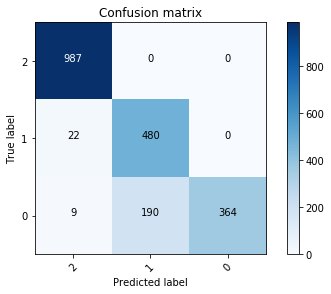

In [60]:
plot_confusion_matrix(cm,data2['FTR'].unique())

In [61]:
predict = {
    'HomeTeam':'Arsenal',
    'FTHG': 5,
    'FTAG': 1,
    'HTHG': 2,
    'HTAG': 1,
    'HTR' : 'H',
    'Referee' : 'A Wiley',
    'HS': 8,
    'AS': 3,
    'HF': 1,
    'AF': 4,
    'HC': 2,
    'AC': 2,
    'HY': 0,
    'AY': 0,
    'HR': 0,
    'AR': 0,
}